In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [9]:
pip install --upgrade numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
#pip uninstall scikit-learn

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
cierra_data =pd.read_csv('cierra_updated.csv')
cierra_data.head()
cierra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2479 non-null   object
 1   title        2479 non-null   object
 2   price        2478 non-null   object
 3   link         2479 non-null   object
 4   image        2477 non-null   object
 5   description  2340 non-null   object
 6   top          1920 non-null   object
 7   middle       1530 non-null   object
 8   base         1233 non-null   object
dtypes: object(9)
memory usage: 174.4+ KB


### Price

In [14]:
# Step 1.1: Clean the 'price' column by removing non-numeric characters and converting to numeric

cierra_data['price'] = cierra_data['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
cierra_data['price'] = cierra_data['price'].replace('', np.nan).astype(float)


In [15]:
# Impute the missing value in 'price' with the median
median_price = cierra_data['price'].median()
cierra_data['price'].fillna(median_price, inplace=True)

# Verify that there are no missing values in the 'price' column
cierra_data_price_missing = cierra_data['price'].isnull().sum()
print(f"Missing values in 'price' after imputation: {cierra_data_price_missing}")

# Summary statistics to confirm successful cleaning
print(cierra_data['price'].describe())

Missing values in 'price' after imputation: 0
count     2479.000000
mean     21627.470754
std      14475.403134
min       3500.000000
25%      11300.000000
50%      17500.000000
75%      28000.000000
max      97500.000000
Name: price, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_5116\882753048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cierra_data['price'].fillna(median_price, inplace=True)


In [16]:
# Step 1.3: Fill missing scent notes with placeholders (e.g., empty strings)
cierra_data['top'].fillna('', inplace=True)
cierra_data['middle'].fillna('', inplace=True)
cierra_data['base'].fillna('', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5116\3838487880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cierra_data['top'].fillna('', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_5116\3838487880.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

## Checking for missing values

In [17]:
# Confirm the cleaning by checking for any remaining missing values
missing_values = cierra_data.isnull().sum()
print("Missing values after cleaning:\n", missing_values)

# Optional: Show summary statistics of the 'price' column to confirm the transformation
print("Price column summary:\n", cierra_data['price'].describe())

Missing values after cleaning:
 category         0
title            0
price            0
link             0
image            2
description    139
top              0
middle           0
base             0
dtype: int64
Price column summary:
 count     2479.000000
mean     21627.470754
std      14475.403134
min       3500.000000
25%      11300.000000
50%      17500.000000
75%      28000.000000
max      97500.000000
Name: price, dtype: float64


Step 2: Exploratory Data Analysis (EDA) and Visualization

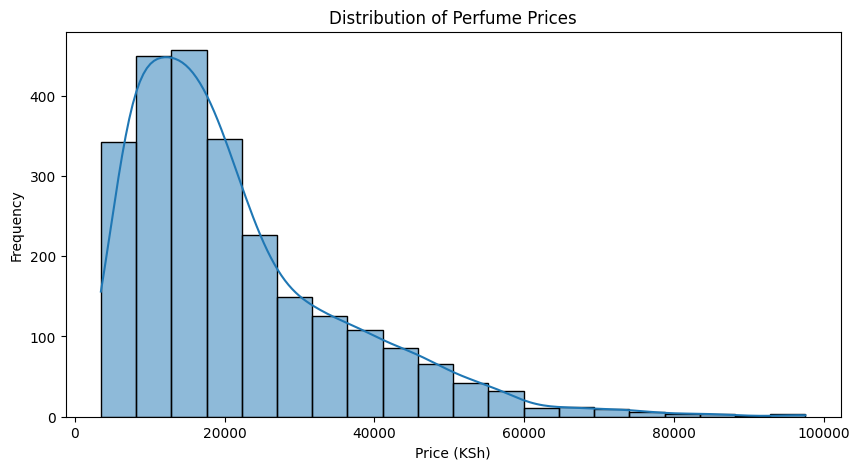

In [18]:
# 1. Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(cierra_data['price'], bins=20, kde=True)
plt.title("Distribution of Perfume Prices")
plt.xlabel("Price (KSh)")
plt.ylabel("Frequency")
plt.show()

In [40]:
# 1. Combine and clean all notes from 'top', 'middle', and 'base' columns
# - Fill missing values with empty strings
# - Convert to lowercase
# - Remove generic words like 'notes'

# Fill missing values, combine all notes, split by commas, and convert to lowercase
all_notes = pd.Series(cierra_data[['top', 'middle', 'base']].fillna('').values.ravel())
notes_split = all_notes.str.lower().str.split(',').explode().str.strip()  # Split and clean

# Remove common words like "notes"
# Filter out any instances of unwanted words
unwanted_words = {'notes', 'note',' top notes'}  # Set of words to exclude
cleaned_notes = notes_split[~notes_split.isin(unwanted_words)]

# 2. Count frequency of each unique note after cleaning
note_counts = Counter(cleaned_notes)
most_common_notes = note_counts.most_common(20)  # Get top 20 most common notes

# 3. Display the results
print("Top 20 Most Common Scent Notes (after cleaning):")
for note, count in most_common_notes:
    print(f"{note}: {count}")

Top 20 Most Common Scent Notes (after cleaning):
: 2781
musk: 125
patchouli: 112
vanilla: 105
jasmine: 104
bergamot: 100
amber: 98
sandalwood: 92
vetiver: 73
rose: 65
tonka bean: 51
notes:: 50
fragrance notes:: 48
cardamom: 48
cinnamon: 42
lemon: 41
pink pepper: 38
mandarin: 38
top notes: bergamot: 37
cedar: 37


In [20]:
# 2. Scent Note Frequency
# Combine all scent notes into one series for analysis
all_notes = pd.Series(cierra_data[['top', 'middle', 'base']].fillna('').values.ravel())
notes_split = all_notes.str.split(',').dropna().explode().str.strip()  # Split and clean notes


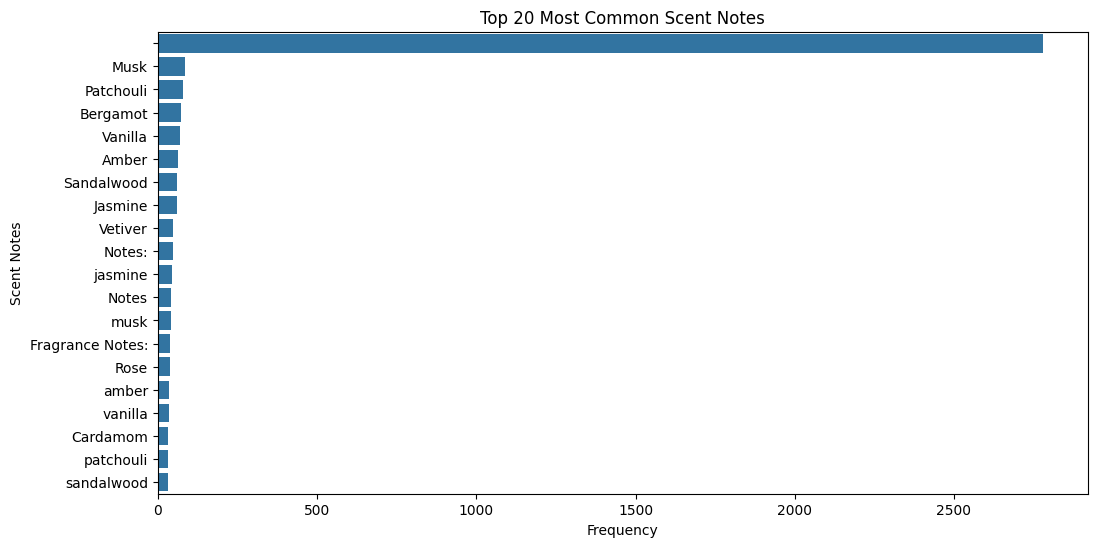

In [21]:


# Convert notes_split to a DataFrame
notes_split_df = pd.DataFrame(notes_split, columns=['note'])

# Count occurrences of each note
top_20_notes = notes_split_df['note'].value_counts().iloc[:20]

plt.figure(figsize=(12, 6))
sns.barplot(y=top_20_notes.index, x=top_20_notes.values)
plt.title("Top 20 Most Common Scent Notes")
plt.xlabel("Frequency")
plt.ylabel("Scent Notes")
plt.show()


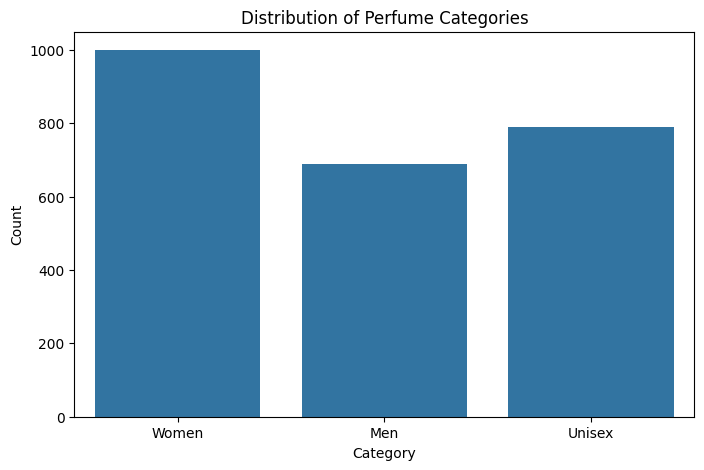

In [22]:
# 3. Category Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=cierra_data, x='category')
plt.title("Distribution of Perfume Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Preprocessing

In [23]:


# 1. Combine scent notes into a single column for each perfume
# Fill missing values with empty strings, split notes, and combine into a single scent profile
cierra_data['scent_profile'] = cierra_data[['top', 'middle', 'base']].fillna('').agg(', '.join, axis=1)

# 2. Price Normalization
scaler = MinMaxScaler()
cierra_data['price_normalized'] = scaler.fit_transform(cierra_data[['price']])

# Display the prepared data
print(cierra_data[['title', 'scent_profile', 'price_normalized']].head())


                                               title  \
0  Aberchrombie & Fitch, Authentic Away Edp 100Ml...   
1  Aberchrombie & Fitch, Authentic Night Edp 100Ml W   
2  Aberchrombie & Fitch, Authentic Night Edp 100M...   
3                             AFNAN, 9AM EDP 100ML W   
4                  AFNAN, VIOLET BOUQUET EDP 100ML W   

                                       scent_profile  price_normalized  
0  Top Notes: Brazilian Mandarin, Red Currant, Pe...          0.078723  
1  Fragrance Notes:, A mouth-watering combination...          0.041489  
2  3 Piece Set Includes:, – 100ml Eau De Parfum S...          0.059574  
3  Top Notes: Mandarin, Cedrat, Cardamom and Pink...          0.031915  
4  Top notes: Sweet, Woody, Saffron, Citrus., Mid...          0.040426  


###  Building the Recommendation System

Step 1: Vectorizing Scent Profiles
Combine Scent Notes: We’ll use the cleaned scent_profile column (which combines top, middle, and base notes) and turn it into a TF-IDF matrix. Each perfume’s scent profile will become a vector, allowing us to compare perfumes based on scent similarity.
Calculate Similarity Matrix: Using cosine similarity, we can calculate how similar each perfume is to others based on their scent profiles

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming cierra_data is preprocessed and has a combined 'scent_profile' column

# 1. Vectorize the 'scent_profile' using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cierra_data['scent_profile'].fillna(''))  # Handle any missing scent profiles

# 2. Compute the cosine similarity matrix
scent_similarity = cosine_similarity(tfidf_matrix)

# Display the shape of the similarity matrix
print("Shape of Scent Similarity Matrix:", scent_similarity.shape)


Shape of Scent Similarity Matrix: (2479, 2479)


Next Step: Price-Based Filtering

In [27]:
import numpy as np
import pandas as pd

def recommend_perfumes(user_scent, min_price, max_price, top_n=5):
    """
    Recommends perfumes based on user's scent preference and price range.
    
    Parameters:
        user_scent (str): The scent note(s) preferred by the user.
        min_price (float): Minimum price range for the recommendations.
        max_price (float): Maximum price range for the recommendations.
        top_n (int): Number of top recommendations to return.
    
    Returns:
        DataFrame: Top recommended perfumes based on scent and price range.
    """
    # 1. Vectorize the user's input scent using the same TF-IDF vectorizer
    user_tfidf = tfidf_vectorizer.transform([user_scent.lower()])  # Convert to lowercase for consistency
    
    # 2. Calculate cosine similarity between user scent and all perfumes
    user_similarity_scores = cosine_similarity(user_tfidf, tfidf_matrix).flatten()
    
    # 3. Filter perfumes within the specified price range
    price_filtered_indices = (cierra_data['price'] >= min_price) & (cierra_data['price'] <= max_price)
    price_filtered_data = cierra_data[price_filtered_indices]
    price_filtered_scores = user_similarity_scores[price_filtered_indices]
    
    # 4. Sort perfumes by similarity scores (descending) and get top N
    top_indices = np.argsort(price_filtered_scores)[-top_n:][::-1]  # Get indices of top N similar perfumes
    
    # 5. Retrieve the top recommendations
    recommendations = price_filtered_data.iloc[top_indices]
    
    # Return the recommendations with selected columns for display
    return recommendations[['title', 'scent_profile', 'price']]

# Example usage:
# User preferences: "vanilla, jasmine", minimum price of KSh 5000, maximum price of KSh 20000
recommended_perfumes = recommend_perfumes("vanilla, jasmine", min_price=5000, max_price=20000, top_n=5)
print("Top Recommended Perfumes:\n", recommended_perfumes)


Top Recommended Perfumes:
                                        title  \
413            Givenchy, Organza Edp 100Ml W   
717      Montale, Vanille Absolu Edp 100Ml W   
961  Viva La Juicy, Gold Couture Edp 100Ml W   
298      Dolce & Gabbana, The One Edp 75Ml W   
370   Giorgio Armani, Armani Code Edp 75Ml W   

                                         scent_profile    price  
413    Head: Jasmine.Heart: Gardenia.Base: Vanilla, ,   12000.0  
717       The must-have Vanilla of our collection., ,   12300.0  
961  Key Notes, Luscious Berry, Jasmine Sambac, Van...   9000.0  
298  Notes : Bergamot, Litchi, Peach, Lily Of The V...  12500.0  
370  Top notes: Jasmine, OrangeHeart notes: Orange ...  18400.0  


In [49]:
# Example usage:
# User preferences: "vanilla, jasmine", minimum price of KSh 5000, maximum price of KSh 20000
recommended_perfumes = recommend_perfumes("", min_price=2000, max_price=5000, top_n=5)
print("Top Recommended Perfumes:\n", recommended_perfumes)

Top Recommended Perfumes:
                                              title  \
1896    FRANCK OLIVIER, PURE ADDICTION EDP 100ML U   
1895       Franck Olivier, Oud Vanille Edp 100Ml U   
1854  Dior, Collection Privee 7.5Ml Travel Tubes U   
1605       Rue Broca, Pride Pour Homme Edt 100Ml M   
1416               JAGUAR, CLASSIC RED EDT 100ML M   

                                          scent_profile   price  
1896  At first inspiration, a delicious juicy orange...  4700.0  
1895  At the top of this enchanting fragrance are no...  4600.0  
1854                                               , ,   4200.0  
1605                                               , ,   4700.0  
1416                                               , ,   4700.0  


In [33]:

import csv
import re
import time
import nltk
import string
import pickle

import numpy as np
import pandas as pd
from itertools import chain
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer

In [34]:

#tokenize
tokenizer = RegexpTokenizer(r'\w+')

In [35]:
def remove_punctuation(text):
    #tokenizer breaks string into a list of words
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join([c for c in text if c not in string.punctuation])
    return text

In [36]:
def make_lower_case(text):
    text = text.lower()
    return text

In [ ]:
cierra_data.top=cierra_data.top

In [38]:
cierra_data.brand_names=cierra_data.top.apply(lambda x: remove_punctuation(x))
cierra_data.brand_names=cierra_data.top.apply(lambda x: make_lower_case(x))
cierra_data.product_names=cierra_data.middle.apply(lambda x: remove_punctuation(x))
cierra_data.product_names=cierra_data.middle.apply(lambda x: make_lower_case(x))
cierra_data.product_names=cierra_data.base.apply(lambda x: remove_punctuation(x))
cierra_data.product_names=cierra_data.base.apply(lambda x: make_lower_case(x))

#cierra_data.description=cierra_data['description'].apply(lambda x: remove_punctuation(x))
#cierra_data.description=cierra_data['description'].apply(lambda x: make_lower_case(x))

In [43]:
import spacy
import pandas as pd

# Load the spaCy English model (ensure you have installed it with `python -m spacy download en_core_web_sm`)
nlp = spacy.load('en_core_web_sm')

# Sample perfume dataset (assuming 'scent_profile' column combines top, middle, base notes)
# For demonstration, cierra_data should already contain a 'scent_profile' column
cierra_data['scent_profile'] = cierra_data['scent_profile'].fillna('')  # Handle missing values

def lemmatize_scent_profile(text):
    """
    Tokenizes and lemmatizes a scent profile string.
    
    Parameters:
        text (str): The scent profile of a perfume as a single string.
        
    Returns:
        str: A lemmatized and cleaned scent profile.
    """
    doc = nlp(text.lower())  # Convert to lowercase for consistency
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(lemmatized_tokens)

# Apply the lemmatization function to the scent profiles
cierra_data['scent_profile_lemmatized'] = cierra_data['scent_profile'].apply(lemmatize_scent_profile)

# Display the original and lemmatized scent profiles for comparison
print(cierra_data[['scent_profile', 'scent_profile_lemmatized']].head())


                                       scent_profile  \
0  Top Notes: Brazilian Mandarin, Red Currant, Pe...   
1  Fragrance Notes:, A mouth-watering combination...   
2  3 Piece Set Includes:, – 100ml Eau De Parfum S...   
3  Top Notes: Mandarin, Cedrat, Cardamom and Pink...   
4  Top notes: Sweet, Woody, Saffron, Citrus., Mid...   

                            scent_profile_lemmatized  
0  note brazilian mandarin red currant pear heart...  
1  fragrance note mouth water combination black c...  
2  3 piece set include 100ml eau de parfum spray ...  
3  note mandarin cedrat cardamom pink pepper midd...  
4  note sweet woody saffron citrus middle note ar...  
